In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [2]:
import pickle
data = pickle.load(open('save.p', 'rb'))

In [3]:
train = data[0]
test = data[1]
df = data[2]
train_1 = data[3]
test_1 = data[4]
actives = data[5]
actives2 = data[6]

data = 1

In [4]:
float_cols = ['national_inv', 'lead_time', 'in_transit_qty', 
              'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 
              'sales_1_month', 'sales_3_month', 'sales_6_month', 
              'sales_9_month', 'min_bank', 'pieces_past_due', 
              'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty'] 
object_cols = ['potential_issue', 'deck_risk', 'oe_constraint', 
               'ppap_risk', 'stop_auto_buy', 'rev_stop', 
               'went_on_backorder']

<br>

### Visualization

Ploted with 5000 samples from dimention reduction processed data by PCA(Principal Component Analysis), with 2 componenets.

#### Original train set

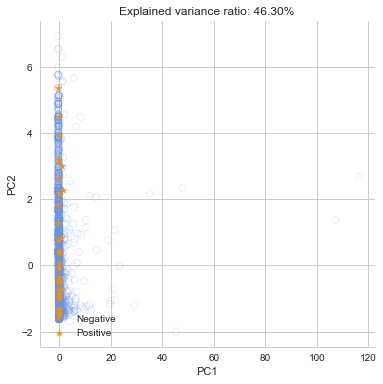

In [5]:
def plot_2d(X, y, title=''):
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(X)

    from sklearn.decomposition import PCA
    dec = PCA(n_components=2)
    X_reduced = dec.fit_transform(X_std)
    
    f, ax = plt.subplots(figsize=(6,6))
    ax.scatter(X_reduced[y==0,0], X_reduced[y==0,1], alpha=0.5, 
               facecolors='none', edgecolors='cornflowerblue', label="Negative")
    ax.scatter(X_reduced[y==1,0], X_reduced[y==1,1], c='darkorange', marker='*', 
               label='Positive')
    plt.title("Explained variance ratio: %.2f%%" % (100*dec.explained_variance_ratio_.sum()))
    ax.legend(loc='lower left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    plt.show()
    
sample = train.sample(5000, random_state=36)

X_sample = sample.drop('went_on_backorder',axis=1).values
y_sample = sample['went_on_backorder'].values

plot_2d(X_sample, y_sample)

#### Normalized train set

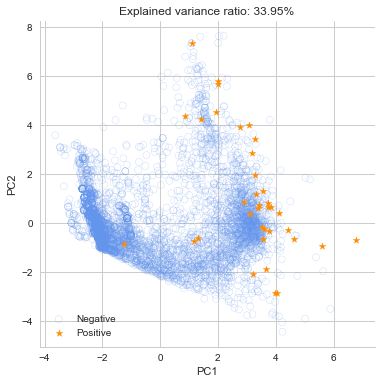

In [6]:
sample = train_1.sample(5000, random_state=36)

X_sample = sample.drop('went_on_backorder',axis=1).values
y_sample = sample['went_on_backorder'].values

plot_2d(X_sample, y_sample)

#### Active train set with ( AND condition )

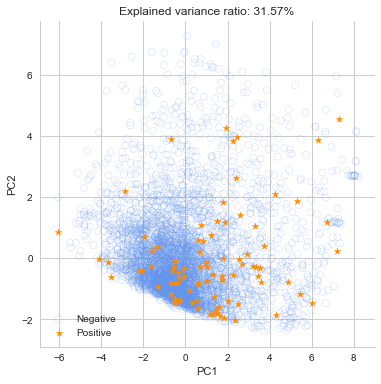

In [7]:
sample = actives.sample(5000, random_state=36)

X_sample = sample.drop('went_on_backorder',axis=1).values
y_sample = sample['went_on_backorder'].values

plot_2d(X_sample, y_sample)

#### Active train set with ( OR condition )

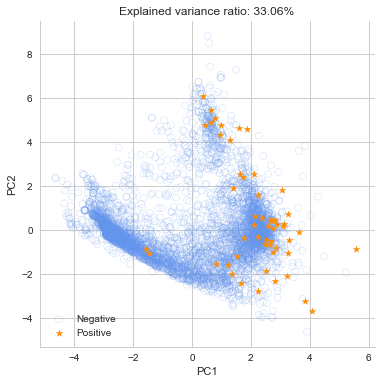

In [8]:
sample = actives2.sample(5000, random_state=36)

X_sample = sample.drop('went_on_backorder',axis=1).values
y_sample = sample['went_on_backorder'].values

plot_2d(X_sample, y_sample)

<br>

### Data preparation

#### Normalized train set

In [9]:
from collections import Counter
X0 = train_1.drop('went_on_backorder', axis=1).values
y0 = train_1['went_on_backorder'].values
print('Imbalanced ratio in training set_0: 1:%i' % (Counter(y0)[0]/Counter(y0)[1]))

from sklearn.model_selection import train_test_split
X0_train, X0_valid, y0_train, y0_valid = train_test_split(X0, y0, test_size=0.20, stratify=y0, random_state=42)

Imbalanced ratio in training set_0: 1:148


#### Active train set with ( AND condition )

In [10]:
X1 = actives.drop('went_on_backorder', axis=1).values
y1 = actives['went_on_backorder'].values
print('Imbalanced ratio in training set_1: 1:%i' % (Counter(y1)[0]/Counter(y1)[1]))

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.20, stratify=y1, random_state=42)

Imbalanced ratio in training set_1: 1:50


#### Active train set with ( OR condition )

In [11]:
X2 = actives2.drop('went_on_backorder', axis=1).values
y2 = actives2['went_on_backorder'].values
print('Imbalanced ratio in training set_2: 1:%i' % (Counter(y2)[0]/Counter(y2)[1]))

X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.20, stratify=y2, random_state=42)

Imbalanced ratio in training set_2: 1:106


#### Processed Test set

In [12]:
test_X = test_1.drop('went_on_backorder', axis=1).values
test_Y = test_1['went_on_backorder'].values
print('Imbalanced ratio in training set_2: 1:%i' % (Counter(y2)[0]/Counter(y2)[1]))

Imbalanced ratio in training set_2: 1:106


<br>

## Learning Classifiers

In [13]:
from sklearn import tree, ensemble
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from xgboost import XGBClassifier

cart_0 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)
rus_0 = make_pipeline(RandomUnderSampler(),tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5))
forest_0 = ensemble.RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)
xgb_0 = XGBClassifier(max_depth=15, learning_rate=0.1)

cart_1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)
rus_1 = make_pipeline(RandomUnderSampler(),tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5))
forest_1 = ensemble.RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)
xgb_1 = XGBClassifier(max_depth=15, learning_rate=0.1)

cart_2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)
rus_2 = make_pipeline(RandomUnderSampler(),tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5))
forest_2 = ensemble.RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)
xgb_2 = XGBClassifier(max_depth=15, learning_rate=0.1)

C:\Python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### ROC_AUC plotter (Receiver Operator Characteristic Area Under the Curve)

In [14]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

### Precision & Recall plotter

In [15]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_true,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_true, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

<br>

## Learning and result of each models

### Normalied train set

In [16]:
cart_0.fit(X0_train, y0_train)
rus_0.fit(X0_train, y0_train)
forest_0.fit(X0_train, y0_train)
xgb_0.fit(X0_train, y0_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

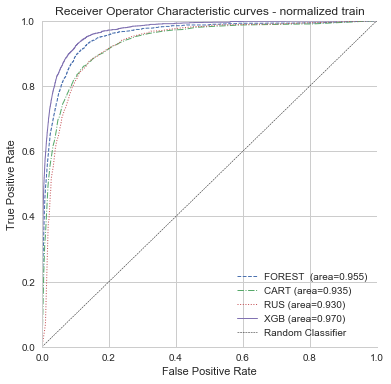

In [17]:
f, ax = plt.subplots(figsize=(6,6))

roc_auc_plot(y0_valid,forest_0.predict_proba(X0_valid),label='FOREST ',l='--')
roc_auc_plot(y0_valid,cart_0.predict_proba(X0_valid),label='CART', l='-.')
roc_auc_plot(y0_valid,rus_0.predict_proba(X0_valid),label='RUS',l=':')
roc_auc_plot(y0_valid,xgb_0.predict_proba(X0_valid),label='XGB',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves - normalized train')
sns.despine()
plt.show()

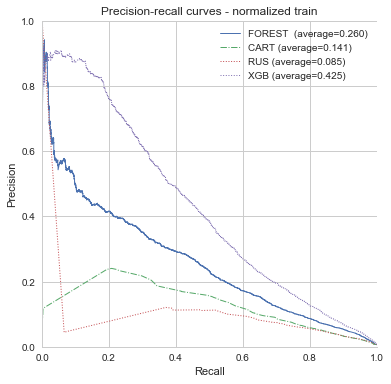

In [18]:
f, ax = plt.subplots(figsize=(6,6))

precision_recall_plot(y0_valid,forest_0.predict_proba(X0_valid),label='FOREST ',l='-')
precision_recall_plot(y0_valid,cart_0.predict_proba(X0_valid),label='CART',l='-.')
precision_recall_plot(y0_valid,rus_0.predict_proba(X0_valid),label='RUS',l=':')
precision_recall_plot(y0_valid,xgb_0.predict_proba(X0_valid),label='XGB',l=':')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper right")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves - normalized train')
sns.despine()
plt.show()

In [19]:
print(sk.metrics.classification_report(y0_valid,xgb_0.predict(X0_valid)))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    335313
          1       0.84      0.14      0.25      2259

avg / total       0.99      0.99      0.99    337572



In [20]:
print(sk.metrics.classification_report(test_Y,xgb_0.predict(test_X)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    239387
          1       0.43      0.01      0.03      2688

avg / total       0.98      0.99      0.98    242075



<br>

### Active train set ( AND condition )

In [21]:
cart_1.fit(X1_train, y1_train)
rus_1.fit(X1_train, y1_train)
forest_1.fit(X1_train, y1_train)
xgb_1.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

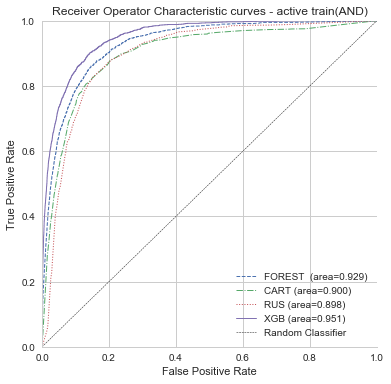

In [22]:
f, ax = plt.subplots(figsize=(6,6))

roc_auc_plot(y1_valid,forest_1.predict_proba(X1_valid),label='FOREST ',l='--')
roc_auc_plot(y1_valid,cart_1.predict_proba(X1_valid),label='CART', l='-.')
roc_auc_plot(y1_valid,rus_1.predict_proba(X1_valid),label='RUS',l=':')
roc_auc_plot(y1_valid,xgb_1.predict_proba(X1_valid),label='XGB',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves - active train(AND)')
sns.despine()
plt.show()

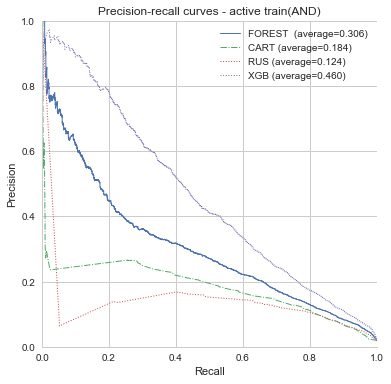

In [23]:
f, ax = plt.subplots(figsize=(6,6))

precision_recall_plot(y1_valid,forest_1.predict_proba(X1_valid),label='FOREST ',l='-')
precision_recall_plot(y1_valid,cart_1.predict_proba(X1_valid),label='CART',l='-.')
precision_recall_plot(y1_valid,rus_1.predict_proba(X1_valid),label='RUS',l=':')
precision_recall_plot(y1_valid,xgb_1.predict_proba(X1_valid),label='XGB',l=':')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper right")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves - active train(AND)')
sns.despine()
plt.show()

In [24]:
print(sk.metrics.classification_report(y1_valid,xgb_1.predict(X1_valid)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     84607
          1       0.80      0.17      0.27      1683

avg / total       0.98      0.98      0.98     86290



In [25]:
print(sk.metrics.classification_report(test_Y,xgb_1.predict(test_X)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    239387
          1       0.43      0.02      0.04      2688

avg / total       0.98      0.99      0.98    242075



<br>

### Active train set ( OR condition )

In [26]:
cart_2.fit(X2_train, y2_train)
rus_2.fit(X2_train, y2_train)
forest_2.fit(X2_train, y2_train)
xgb_2.fit(X2_train, y2_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

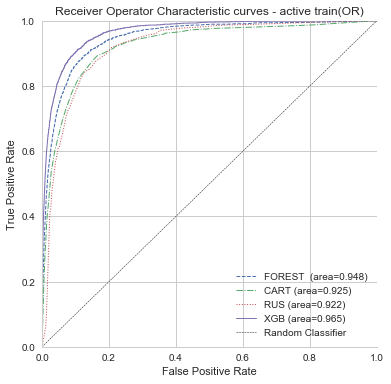

In [27]:
f, ax = plt.subplots(figsize=(6,6))

roc_auc_plot(y2_valid,forest_2.predict_proba(X2_valid),label='FOREST ',l='--')
roc_auc_plot(y2_valid,cart_2.predict_proba(X2_valid),label='CART', l='-.')
roc_auc_plot(y2_valid,rus_2.predict_proba(X2_valid),label='RUS',l=':')
roc_auc_plot(y2_valid,xgb_2.predict_proba(X2_valid),label='XGB',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves - active train(OR)')
sns.despine()
plt.show()

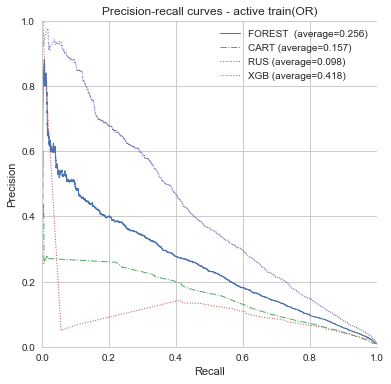

In [28]:
f, ax = plt.subplots(figsize=(6,6))

precision_recall_plot(y2_valid,forest_2.predict_proba(X2_valid),label='FOREST ',l='-')
precision_recall_plot(y2_valid,cart_2.predict_proba(X2_valid),label='CART',l='-.')
precision_recall_plot(y2_valid,rus_2.predict_proba(X2_valid),label='RUS',l=':')
precision_recall_plot(y2_valid,xgb_2.predict_proba(X2_valid),label='XGB',l=':')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper right")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves - active train(OR)')
sns.despine()
plt.show()

In [29]:
print(sk.metrics.classification_report(y2_valid,xgb_2.predict(X2_valid)))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    233911
          1       0.81      0.13      0.22      2201

avg / total       0.99      0.99      0.99    236112



In [30]:
print(sk.metrics.classification_report(test_Y,xgb_2.predict(test_X)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    239387
          1       0.56      0.02      0.03      2688

avg / total       0.98      0.99      0.98    242075



<br>

From the result, selected XGBoost with Active trainset (AND condition) trained model. (xgb_1)

In addition, added random over sampling to minimize imbalance problem.

In [68]:
pd.DataFrame(xgb_1.feature_importances_, train.columns[:-1], ['feature_importance'])

,feature_importance
national_inv,0.086803
lead_time,0.032052
in_transit_qty,0.028365
forecast_3_month,0.092083
forecast_6_month,0.071632
forecast_9_month,0.081219
sales_1_month,0.089578
sales_3_month,0.095290
sales_6_month,0.080599
sales_9_month,0.084532


In [55]:
from imblearn.over_sampling import RandomOverSampler

imb_xgb = make_pipeline(RandomOverSampler(random_state=0),XGBClassifier(max_depth=8, learning_rate=0.1))
imb_xgb.fit(X1_train, y1_train)

print("Xgboost with oversampler")
print(sk.metrics.classification_report(y1_valid,imb_xgb.predict(X1_valid)))
print(sk.metrics.classification_report(test_Y,imb_xgb.predict(test_X)))
print()
print("Xgboost only")
print(sk.metrics.classification_report(y1_valid,xgb_1.predict(X1_valid)))
print(sk.metrics.classification_report(test_Y,xgb_1.predict(test_X)))

Xgboost with oversampler
             precision    recall  f1-score   support

          0       1.00      0.90      0.95     84607
          1       0.14      0.81      0.24      1683

avg / total       0.98      0.90      0.93     86290

             precision    recall  f1-score   support

          0       0.99      0.97      0.98    239387
          1       0.17      0.54      0.26      2688

avg / total       0.99      0.97      0.97    242075


Xgboost only
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     84607
          1       0.80      0.17      0.27      1683

avg / total       0.98      0.98      0.98     86290

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    239387
          1       0.43      0.02      0.04      2688

avg / total       0.98      0.99      0.98    242075

